In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv("dog_data_09032022.csv")
df.tail(3)

,Unnamed: 0,dog,height,weight,life,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,...,Barking Level,Mental Stimulation Needs,popularity_rank,color,marking,health,grooming,excercise,training,nutrition
280,280,xoloitzcuintli,~10-14 inches (toy)~14-18 inches (miniature)~1...,~10-15 pounds (toy)~15-30 pounds (miniature)~3...,13-18 years,5,3,3,1,1,...,3,4,119 of 1,Black-Black & White-Black White & Tan-Brindle-...,Spotted-White Markings-Tan Markings-Black Mark...,Owning a dog is not just a privilege; it’s a r...,"Xolos are generally healthy dogs, and responsi...","Coated Xolos have an easy-care short coat, req...","Xolos like long walks and upbeat play, but the...",Xolos need a consistent training regimen and c...
281,281,yakutian-laika,~21-23 inches,~40-55 pounds,10-12 years,5,5,4,4,2,...,4,5,NaN,Black & White-Brown & White-Gray & White-White...,Black Markings-Tri-Colored-Buff Markings,Owning a dog is not just a privilege; it’s a r...,"The Yakutian Laika is a hardy breed, and to ke...",The Yakutian Laika experiences seasonal sheddi...,The Yakutian Laika is a sled dog with a well-d...,Training the Yakutian Laika is a rather pleasa...
282,282,yorkshire-terrier,~7-8 inches,~7 pounds,11-15 years,5,5,3,1,5,...,4,4,13 of 1,Black & Tan-Blue & Gold-Blue & Tan-Black & Gold,NaN,Owning a dog is not just a privilege; it’s a r...,"Yorkshire Terriers are generally healthy dogs,...",The Yorkshire Terrier's coat is very similar t...,Even small dogs require exercise to stay healt...,"Yorkies love their owners, and are very intell..."


## Data Cleaning
- Drop unneccsary columns
- Clean height
    - drop all Nan Rows
    - Choose one unit, male and standard
    

In [25]:
# Let's tackle one column after another
# drop first unnamed column
df = df.drop(df.columns[0], axis=1)
df.tail(2)
print(df.shape)

(283, 28)


In [26]:
df['temp'] = df.height.apply(lambda x: len(str(x).split('~')))

In [27]:
# remove all Nan rows
print(df.shape)
df = df[df['height'].notna()]
print(df.shape)

(283, 29)
(273, 29)


## Height Cleaning

In [28]:
# we want to get regular, male, standard
def height_separate(height_str):
    height_str = height_str.lower()
    if 'male' in height_str:
        height_str = height_str.split('(male')[0]
    elif 'standard' in height_str:
        height_str_list = height_str.split('~')
        for height_str_iter in height_str_list:
            if '(standard)' in height_str_iter:
                height_str = height_str_iter
        height_str = height_str.split('(standard)')[0]
        
    # remove inches
    height_str = height_str.replace('inches',"")
    height_str = height_str.replace('pounds',"")
    height_str = height_str.replace('~',"")
        
    return height_str

def height_str_to_val(height_str):
    height_str = height_str.split('-')
    height_val_list = []
    for height_digit in height_str:
        try: 
            height_val = float(height_digit)
            height_val_list.append(height_val)
        except:
            return height_str
    return sum(height_val_list) / len(height_val_list)

In [29]:
df['height'] = df.height.apply(lambda x : height_separate(x))

In [30]:
df['height'] = df.height.apply(lambda x : height_str_to_val(x))

In [31]:
idx_list = []
for i,h in zip(df.index,df.height):
    if type(h) is not float:
        idx_list.append(i)
        print(h)
print(idx_list)

['20 1/2 ', ' 22  ']
['up to 15 ']
['13  & under13', '15 under 20  (13  & under)20', '30  (13', '15 )']
['28  & up ']
['minimum: 25.5', '27.5 ']
['minimum: 23.5', '25.5 ']
['32  minimum ']
['27.5 minimum  ']
['30  & up ']
['28  (average male)26  (average female)']
['22  & up ']
['9.75', '15.75  (small) 15.75', '19.75  (medium) 19.75', '25.75  (large)']
['over 15  ']
['no more than 10 ']
['22', '28  (large) 16', '22  (medium)']
['males 30', '31 females 25', '30 ']
['19.5 ', ' 24.5  males19 ', ' 24  females']
['15½ ']
['minimum 28', '35 ']
['minimum 26  ']
['minimum 21.5', '23.5 ']
['15½ ']
[22, 26, 28, 50, 73, 88, 141, 154, 168, 177, 185, 192, 200, 201, 203, 212, 232, 245, 247, 259, 263, 276]


In [32]:
df.height.loc[22] = (20.5 + 22) / 2
df.height.loc[26] = 15
df.height.loc[28] = 20
df.height.loc[50] = 28
df.height.loc[73] = (22.5 + 27.5) / 2
df.height.loc[88] = (23.5 + 25.5) / 2
df.height.loc[141] = 32
df.height.loc[154] = 27.5
df.height.loc[168] = 30
df.height.loc[177] = 28
df.height.loc[185] = 22
df.height.loc[192] = (15.75+19.75) / 2
df.height.loc[200] = 15
df.height.loc[201] = 10
df.height.loc[203] = (16 +22) / 2
df.height.loc[212] = 30.5
df.height.loc[232] = (19.5+24.5) / 2
df.height.loc[245] = 15.5
df.height.loc[247] = (28+35) / 2
df.height.loc[259] = 26
df.height.loc[263] = 21.5
df.height.loc[276] = 15.5

/Users/glee2/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


## Weight Cleaning

In [33]:
# remove all Nan rows
print(df.shape)
df = df[df['weight'].notna()]
print(df.shape)

(273, 29)
(262, 29)


In [34]:
df['weight'] = df.weight.apply(lambda x : height_separate(x))
df['weight'] = df.weight.apply(lambda x : height_str_to_val(x))

In [35]:
idx_list = []
for i,h in zip(df.index,df.weight):
    if type(h) is not float:
        idx_list.append(i)
        print(h)
print(idx_list)

['minimum: 88', '110 ']
['not exceeding 6 ']
['minimum: 44', '57 ']
['110  & up ']
['under 28 ']
['100  & up ']
['100  or more ']
['under 7 ']
['under 12 ']
['up to 14 ']
['up to 30  ']
['8.5', '17.5  (small) 17.5', '26.5  (medium) 26.5', '55  (large)']
['44', '66  (large) 35', '44  (medium)']
['up to 6.5 ']
['around 10 ']
['minimum 55 ']
[73, 76, 88, 96, 112, 126, 154, 165, 167, 189, 190, 192, 203, 222, 238, 265]


In [36]:
df.weight.loc[73] = (88 + 110)/2
df.weight.loc[76] = 6
df.weight.loc[88] = (44 + 57)/2
df.weight.loc[96] = 110
df.weight.loc[112] = 28
df.weight.loc[126] = 100
df.weight.loc[154] = 100
df.weight.loc[165] = 7
df.weight.loc[167] = 12
df.weight.loc[189] = 14
df.weight.loc[190] = 30
df.weight.loc[192] = (17.5+26.5) / 2
df.weight.loc[203] = (35+44) / 2
df.weight.loc[222] = 6.5
df.weight.loc[238] = 10
df.weight.loc[265] = 55

In [50]:
df.height = df.height.astype(float)
df.weight = df.weight.astype(float)

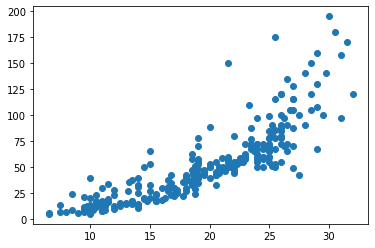

In [51]:
plt.scatter(df.height, df.weight)

/Users/glee2/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height', ylabel='weight'>

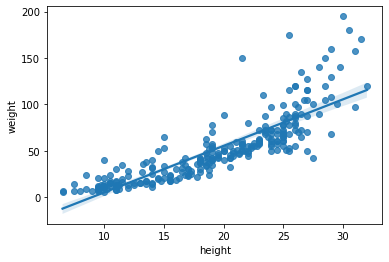

In [53]:
sns.regplot(df.height, df.weight)

In [52]:
np.corrcoef(df.height.values, df.weight.values)

array([[1.        , 0.84117845],
       [0.84117845, 1.        ]])

In [46]:
df.weight.values

array([8.5, 55.0, 60.0, 115.0, 85.0, 87.5, 55.0, 30.0, 67.5, 14.0, 62.5,
       37.5, 130.0, 59.0, 42.5, 57.5, 17.5, 49.5, 50.0, 24.0, 31.0, 52.5,
       51.5, 50.0, 90.0, 20.0, 60.0, 70.0, 65.0, 65.0, 77.0, 60.0, 97.5,
       15.0, 6.0, 87.5, 105.0, 100.0, 67.5, 175.0, 50.5, 8.0, 42.5, 14.25,
       90.0, 18.5, 90.0, 72.5, 35.0, 72.5, 44.0, 47.5, 77.5, 35.0, 120.0,
       9.0, 60.0, 50.0, 120.0, 14.0, 50.0, 34.0, 42.5, 72.5, 134.5, 15.5,
       99.0, 19.0, 72.5, 6, 10.0, 52.5, 72.5, 57.5, 24.0, 77.5, 27.5,
       67.5, 12.0, 36.5, 77.5, 50.5, 24.0, 57.5, 21.0, 17.5, 47.5, 87.5,
       90.0, 110, 37.5, 58.5, 31.0, 67.5, 72.5, 50.0, 11.0, 57.5, 104.5,
       55.0, 42.5, 43.0, 29.0, 65.0, 28, 55.0, 67.5, 35.0, 77.5, 62.5,
       60.0, 72.5, 36.0, 70.0, 67.5, 42.5, 157.5, 100, 127.5, 67.5, 57.5,
       89.0, 52.5, 10.0, 55.0, 77.5, 50.0, 30.0, 51.0, 70.0, 27.0, 61.5,
       120.0, 10.5, 19.5, 70.0, 9.0, 17.5, 46.5, 40.0, 36.5, 45.0, 100,
       27.5, 107.5, 72.5, 17.0, 13.0, 70.0, 140.0, 